Caderno de exploracao dos dados do datasus 2008 pra frente

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [117]:
# Load file
url = "https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/A175133189_28_143_208.csv"
data = pd.read_csv(url, encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter = 12,
 thousands=".", decimal=",", engine='python')

# Options
pd.options.display.float_format="{:.4f}".format
# Show data
data.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.3900,2931283.4200,1541682.5200,1525314.9600,1645953.8400,1406150.6800,3065279.0100,3231494.6100,3117178.6300,...,8085025.6600,9221412.1800,7493310.8800,8092260.1100,7273843.6300,7652120.2800,8725530.6800,11152107.0800,10285455.78,929129659.7200
1,12 Acre,902416.0000,1497206.2600,1794028.4800,1730469.4200,1819443.9200,1828496.0000,2511754.5900,2089107.1400,2275708.5300,...,2874871.2800,3331803.5500,3417691.0700,3076003.2000,2286642.6000,2896340.2400,3045245.8000,3915193.2000,-,420668039.6300
2,13 Amazonas,4735529.4200,7118990.5700,8196635.4900,8259378.4200,7831399.9000,8477273.6200,9368858.7200,9352532.7000,9363099.3500,...,14346553.6000,16018459.0700,14913745.3700,15068304.3500,13509579.2900,19658585.4600,20897542.9300,19346450.1800,14726443.67,1771654871.2300
3,14 Roraima,657889.5300,777939.3100,718688.0300,839994.3900,862347.9600,832440.6600,996693.0900,894271.1800,910424.1700,...,3097113.2100,3059823.8000,2912519.9800,2937346.4300,2868820.9600,2752228.2600,3401864.2900,3015488.3000,2826486.18,305010883.1800
4,15 Pará,18864744.1100,19553758.2000,21937342.7000,20842829.6900,23249952.8800,23240687.5600,24002223.5600,23341218.0300,25172261.3200,...,35925899.0100,34345207.6300,37384336.9400,35512568.1500,28217249.6600,32617541.0500,41625331.2800,38438873.7900,39911193.02,4437115730.7100


In [118]:
# Replace invalid values
data.replace('-', 0, inplace=True)
# Find columns with wrong type
mask = data.dtypes != 'float64'
# Exclude first columns
mask[0] = False
# Fix wrong type
data.loc[:, mask] = data.loc[:, mask].astype('float64')
# Remove number from frist column names
data['Unidade da Federação'] = data['Unidade da Federação'].apply(lambda x: x[3:])

# Desafio: escolher um título mais descritivo, que passe a  mensagem adequada.

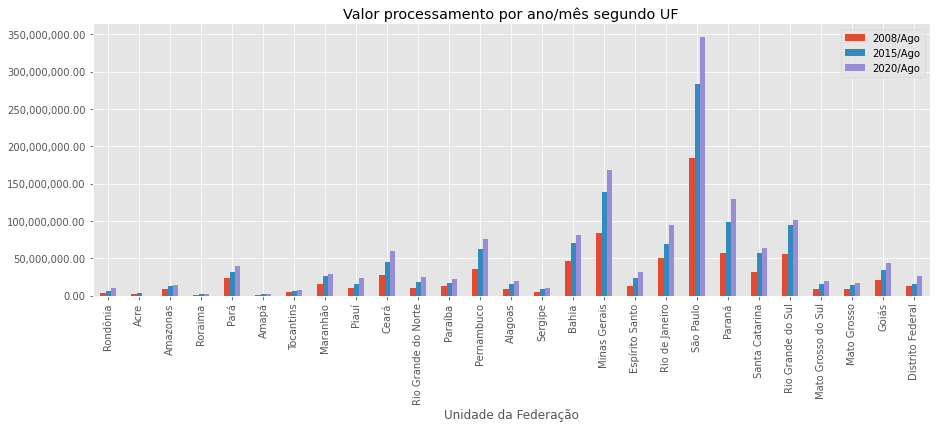

In [119]:
# Mostrar resultado
ax = data.plot(kind="bar", x="Unidade da Federação", y=["2008/Ago","2015/Ago","2020/Ago"], figsize=(15,5))
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("{x:,.2f}"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Valor processamento por ano/mês segundo UF")
plt.show()

# Desafio: faça a mesma análise pro mês mais recente.

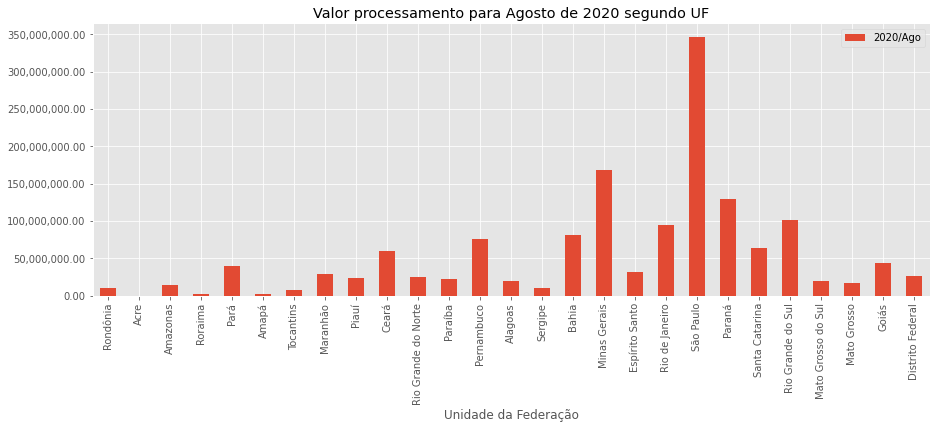

In [120]:
ax = data.loc[:, ['Unidade da Federação', '2020/Ago']].plot(kind="bar", x='Unidade da Federação', figsize=(15,5))
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("{x:,.2f}"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Valor processamento para Agosto de 2020 segundo UF")
plt.show()

# Desafio: reposicionar a legenda. Dentro? Fora? Onde?

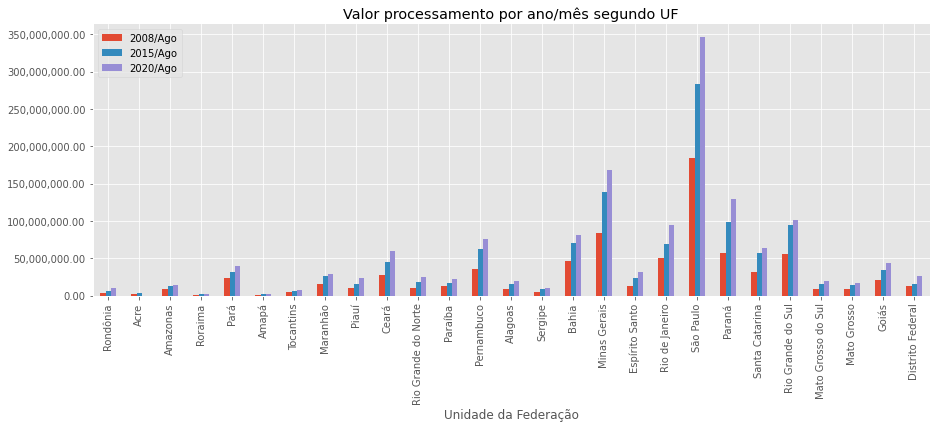

In [121]:
# Mostrar resultado
ax = data.plot(kind="bar", x="Unidade da Federação", y=["2008/Ago","2015/Ago","2020/Ago"], figsize=(15,5))
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("{x:,.2f}"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend(loc='upper left', fancybox=True)
plt.title("Valor processamento por ano/mês segundo UF")
plt.show()

# Desafio: mudar palete de cores com o matplotlib

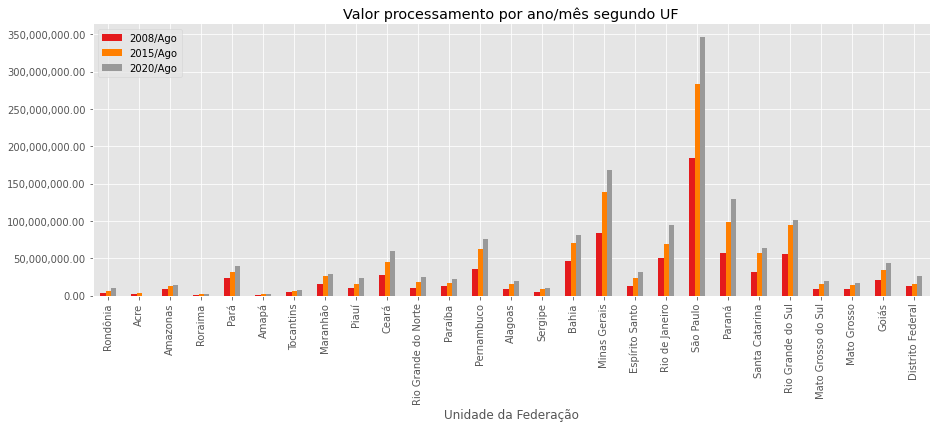

In [122]:
# Mostrar resultado
ax = data.plot(kind="bar", x="Unidade da Federação", y=["2008/Ago","2015/Ago","2020/Ago"], figsize=(15,5), cmap='Set1')
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("{x:,.2f}"))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend(loc='upper left', fancybox=True)
plt.title("Valor processamento por ano/mês segundo UF")
plt.show()

# Desafio: adicionar uma coluna mostrando a região de cada estado

In [123]:
regionDict = {'Acre' : 1, 'Amapá' : 1, 'Amazonas' : 1,  'Pará' : 1, 'Rondônia' : 1, 'Roraima' :1, 'Tocantins' : 1, 'Alagoas' : 2, 'Bahia' : 2, 'Ceará' : 2, 'Maranhão' : 2, 'Paraíba' : 2, \
    'Pernambuco' : 2, 'Piauí' : 2, 'Rio Grande do Norte' : 2, 'Sergipe' : 2, 'Goiás' : 3, 'Mato Grosso' : 3, 'Distrito Federal' : 3, 'Mato Grosso do Sul' : 3, 'Espírito Santo' : 4, \
    'Minas Gerais' : 4, 'Rio de Janeiro' : 4, 'São Paulo' : 4, 'Paraná' : 5, 'Santa Catarina' : 5, 'Rio Grande do Sul' : 5}

data['Região'] = data['Unidade da Federação'].apply(lambda x: regionDict[x])
data.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Região
0,Rondônia,1388528.3900,2931283.4200,1541682.5200,1525314.9600,1645953.8400,1406150.6800,3065279.0100,3231494.6100,3117178.6300,...,9221412.1800,7493310.8800,8092260.1100,7273843.6300,7652120.2800,8725530.6800,11152107.0800,10285455.7800,929129659.7200,1
1,Acre,902416.0000,1497206.2600,1794028.4800,1730469.4200,1819443.9200,1828496.0000,2511754.5900,2089107.1400,2275708.5300,...,3331803.5500,3417691.0700,3076003.2000,2286642.6000,2896340.2400,3045245.8000,3915193.2000,0.0000,420668039.6300,1
2,Amazonas,4735529.4200,7118990.5700,8196635.4900,8259378.4200,7831399.9000,8477273.6200,9368858.7200,9352532.7000,9363099.3500,...,16018459.0700,14913745.3700,15068304.3500,13509579.2900,19658585.4600,20897542.9300,19346450.1800,14726443.6700,1771654871.2300,1
3,Roraima,657889.5300,777939.3100,718688.0300,839994.3900,862347.9600,832440.6600,996693.0900,894271.1800,910424.1700,...,3059823.8000,2912519.9800,2937346.4300,2868820.9600,2752228.2600,3401864.2900,3015488.3000,2826486.1800,305010883.1800,1
4,Pará,18864744.1100,19553758.2000,21937342.7000,20842829.6900,23249952.8800,23240687.5600,24002223.5600,23341218.0300,25172261.3200,...,34345207.6300,37384336.9400,35512568.1500,28217249.6600,32617541.0500,41625331.2800,38438873.7900,39911193.0200,4437115730.7100,1


,Unidade da Federação,Região,Ano,Valor,Mes
0,Rondônia,1,2008,3231494.6100,Ago
1,Acre,1,2008,2089107.1400,Ago
2,Amazonas,1,2008,9352532.7000,Ago
3,Roraima,1,2008,894271.1800,Ago
4,Pará,1,2008,23341218.0300,Ago


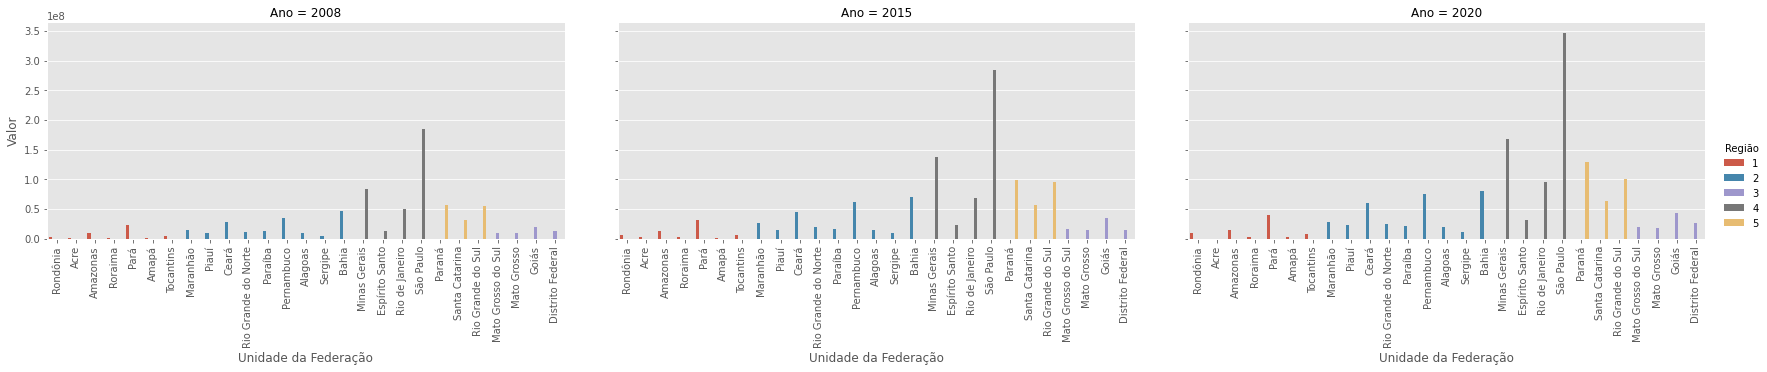

In [204]:
import seaborn as sns
# Mostrar resultado

tempData = data.melt(id_vars=['Unidade da Federação', 'Região'], value_vars=['2008/Ago','2015/Ago','2020/Ago'], var_name='Ano', value_name='Valor')
tempData['Mes'] = tempData['Ano'].apply(lambda x: x[-3:])
tempData['Ano'] = tempData['Ano'].apply(lambda x: x[:4]).astype('int64')
display(tempData.head())
g = sns.catplot(data=tempData, x='Unidade da Federação', y='Valor', hue='Região', col='Ano', col_order=[2008, 2015, 2020], hue_order=[1,2,3,4,5], height=4, aspect=2, kind='bar')
g.set_xticklabels(rotation=90)
plt.show()